In [ ]:
# importing necessary packages
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

# 1. Convlution, Correlation, Cross-correlation

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate https://drive.google.com/uc?id=1rz7OfWcmX05Sm6V-yT9CvIXkAx3d7SsW -O fruit.png
!wget --no-check-certificate https://drive.google.com/uc?id=1UPYyDveYM8pDx1pN2mrv-Jw7-np8oe7r -O template_face.png
!wget --no-check-certificate https://drive.google.com/uc?id=1h36IHsJdBX7Ty61riKLwQs2nhhuC_l9r -O faces.png

--2024-10-31 05:30:35--  https://drive.google.com/uc?id=1rz7OfWcmX05Sm6V-yT9CvIXkAx3d7SsW
Resolving drive.google.com (drive.google.com)... 173.194.79.102, 173.194.79.139, 173.194.79.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1rz7OfWcmX05Sm6V-yT9CvIXkAx3d7SsW [following]
--2024-10-31 05:30:36--  https://drive.usercontent.google.com/download?id=1rz7OfWcmX05Sm6V-yT9CvIXkAx3d7SsW
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.128.132, 2a00:1450:4013:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.128.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137047 (134K) [image/png]
Saving to: ‘fruit.png’

fruit.png           100%[===================>] 133.83K  --.-KB/s    in 0.001s  

2024-10-31 05:30:38 (97.7 MB/s) - ‘fruit.png’ saved 

Image height= 512 px, and width= 512 px and data type: uint8


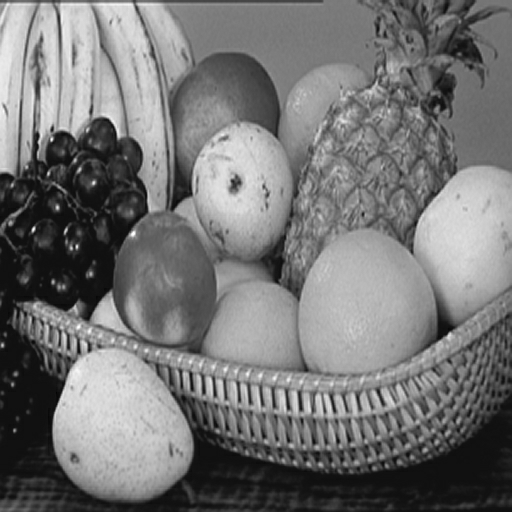

In [ ]:
input=cv2.imread('fruit.png',cv2.IMREAD_GRAYSCALE)
# pring image properties
height, width = input.shape
print("Image height=", height, "px, and width=", width, "px and data type:", input.dtype)

cv2_imshow(input)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


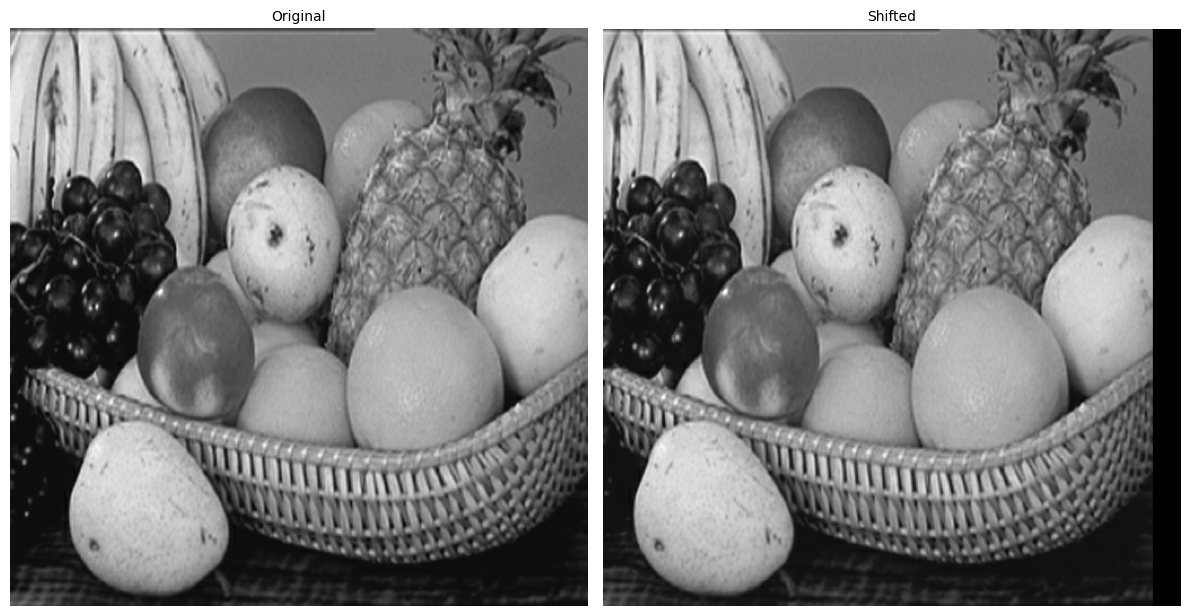

In [ ]:
# a typical day in the world of spatial domain filtering
correlationFilter = np.zeros((51,51),np.uint8)
correlationFilter[25,0]=1
#np.set_printoptions(threshold=np.inf)
print(correlationFilter)

# https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html

# make sure it's flipped
filter = cv2.flip(correlationFilter, -1) # -1 for flipping around both axis

print(filter)

# and convolve
# -1 (cv2.CV_8U:=-1) tells opencv that we want the output to have the same precision as the input, i.e. uint8
# by default it uses mirroring at the edges, you can change it through the borderType parameter
#output = cv2.filter2D(input, -1, filter)
output = cv2.filter2D(input, -1, filter, borderType=cv2.BORDER_CONSTANT)
#output = cv2.filter2D(input, cv2.CV_32F, filter, borderType=cv2.BORDER_CONSTANT)


images = [input, output]
descriptions = ["Original", "Shifted"]

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [ ]:
# cross correlation example for template matching

# the template and the faces
template=cv2.imread('template_face.png',cv2.IMREAD_GRAYSCALE)
faces=cv2.imread('faces.png',cv2.IMREAD_GRAYSCALE)

w, h = template.shape[::-1]

# sensitive to illumination changes
# you can change the matching technique via a parameter
# https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html
matches = cv2.matchTemplate(faces,template,cv2.TM_CCORR_NORMED)
#plt.title("Matches")
#plt.imshow(matches, cmap='gray')

# Finds the global minimum and maximum in an array
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matches)

# max match represents top left corner
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# draw a rectange around the max response
cv2.rectangle(faces, (top_left), bottom_right, 255, 5)


images = [matches, faces, template]
descriptions = ["Matching Result", "Detected Point", "Template"]

fig, axes = plt.subplots(1, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

# 2. Image blurring using box (mean) filter of different sizes

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1ABP7tfx_Pojf1WU5kCGflaYbF282e5fC -O test_pattern_blurring.tif

In [ ]:
# load and display the sample image
image = cv2.imread('test_pattern_blurring.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

In [ ]:
sizes = [(3,3), (5,5), (9,9), (15,15), (35, 35)]

images = [image]
descriptions = ["original image"]

for size in sizes:
  box_filter = np.ones(size, np.float32) / (size[0]*size[1])
  filtered_image = cv2.filter2D(image, -1, box_filter)
  images.append(filtered_image)
  descriptions.append("n = " + str(size[0]))

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

# 3. Gaussian kernel

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1ABP7tfx_Pojf1WU5kCGflaYbF282e5fC -O test_pattern_blurring.tif

In [ ]:
# load and display the sample image
image = cv2.imread('test_pattern_blurring.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

In [ ]:

images = [image]
descriptions = ["original image"]


kernels = [(21, 3.5), (43,7)] # (kernel_size, sigma)

for kernel in kernels:
  gaussian_kernel_1d = cv2.getGaussianKernel(kernel[0], kernel[1])
  gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

  blurred_image = cv2.filter2D(image, -1, gaussian_kernel_2d)
  images.append(blurred_image)
  descriptions.append("n = " + str(kernel[0]) + ", sigma = " + str(kernel[1]))

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

# 4. Noise Reduction using Gaussian and Mean Filters


In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=17DNMzfE3Lc6B6ygU7Sf0DxP1VHx7-MNd -O board_with_noies.tif

In [ ]:
# load and display the sample image
image = cv2.imread('board_with_noies.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

In [ ]:
gaussian_kernel_1d = cv2.getGaussianKernel(19, 3)
gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

gaussian_filtered_image = cv2.filter2D(image, -1, gaussian_kernel_2d)
mean_filtered_image = cv2.blur(image, (7,7))


images = [image, gaussian_filtered_image, mean_filtered_image]
descriptions = ["image with noise", "gaussian filter with size 19 and sigma 3", "mean filter with size 7"]

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

# 5. Sharpening through unsharp masking

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1qYzzxJUwcVcrH5ukAezNO9yk0Mp-YZpa -O baboon.png

In [ ]:
# load and display the sample image
image = cv2.imread('baboon.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

In [ ]:
smoothed_image = cv2.blur(image, (5, 5))

detail_image = cv2.subtract(image, smoothed_image)

sharpened_image_1 = cv2.add(image, 1*detail_image)
sharpened_image_2 = cv2.add(image, 2*detail_image)
sharpened_image_3 = cv2.add(image, 3*detail_image)

images = [image, smoothed_image, detail_image, sharpened_image_1, sharpened_image_1, sharpened_image_2, sharpened_image_3]
descriptions = ["original_image", "smoothed_image (5x5)", "detail_image (original - smoothed)", "sharpened_image (alpha = 1)", "sharpened_image (alpha = 2)", "sharpened_image (alpha = 3)"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

# 6. Edge Detection

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1P1xoFJQzm7l24gaOMeq7aCnZgFjdhcYo -O zebra.jpg

--2024-10-31 05:30:58--  https://drive.google.com/uc?id=1P1xoFJQzm7l24gaOMeq7aCnZgFjdhcYo
Resolving drive.google.com (drive.google.com)... 173.194.79.102, 173.194.79.139, 173.194.79.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1P1xoFJQzm7l24gaOMeq7aCnZgFjdhcYo [following]
--2024-10-31 05:30:58--  https://drive.usercontent.google.com/download?id=1P1xoFJQzm7l24gaOMeq7aCnZgFjdhcYo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.128.132, 2a00:1450:4013:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.128.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25452 (25K) [image/jpeg]
Saving to: ‘zebra.jpg’

zebra.jpg           100%[===================>]  24.86K  --.-KB/s    in 0s      

2024-10-31 05:31:01 (105 MB/s) - ‘zebra.jpg’ saved [2

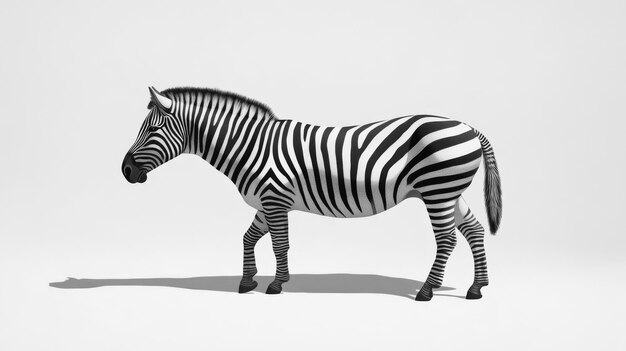

Image height= 351 px, and width= 626 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('zebra.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

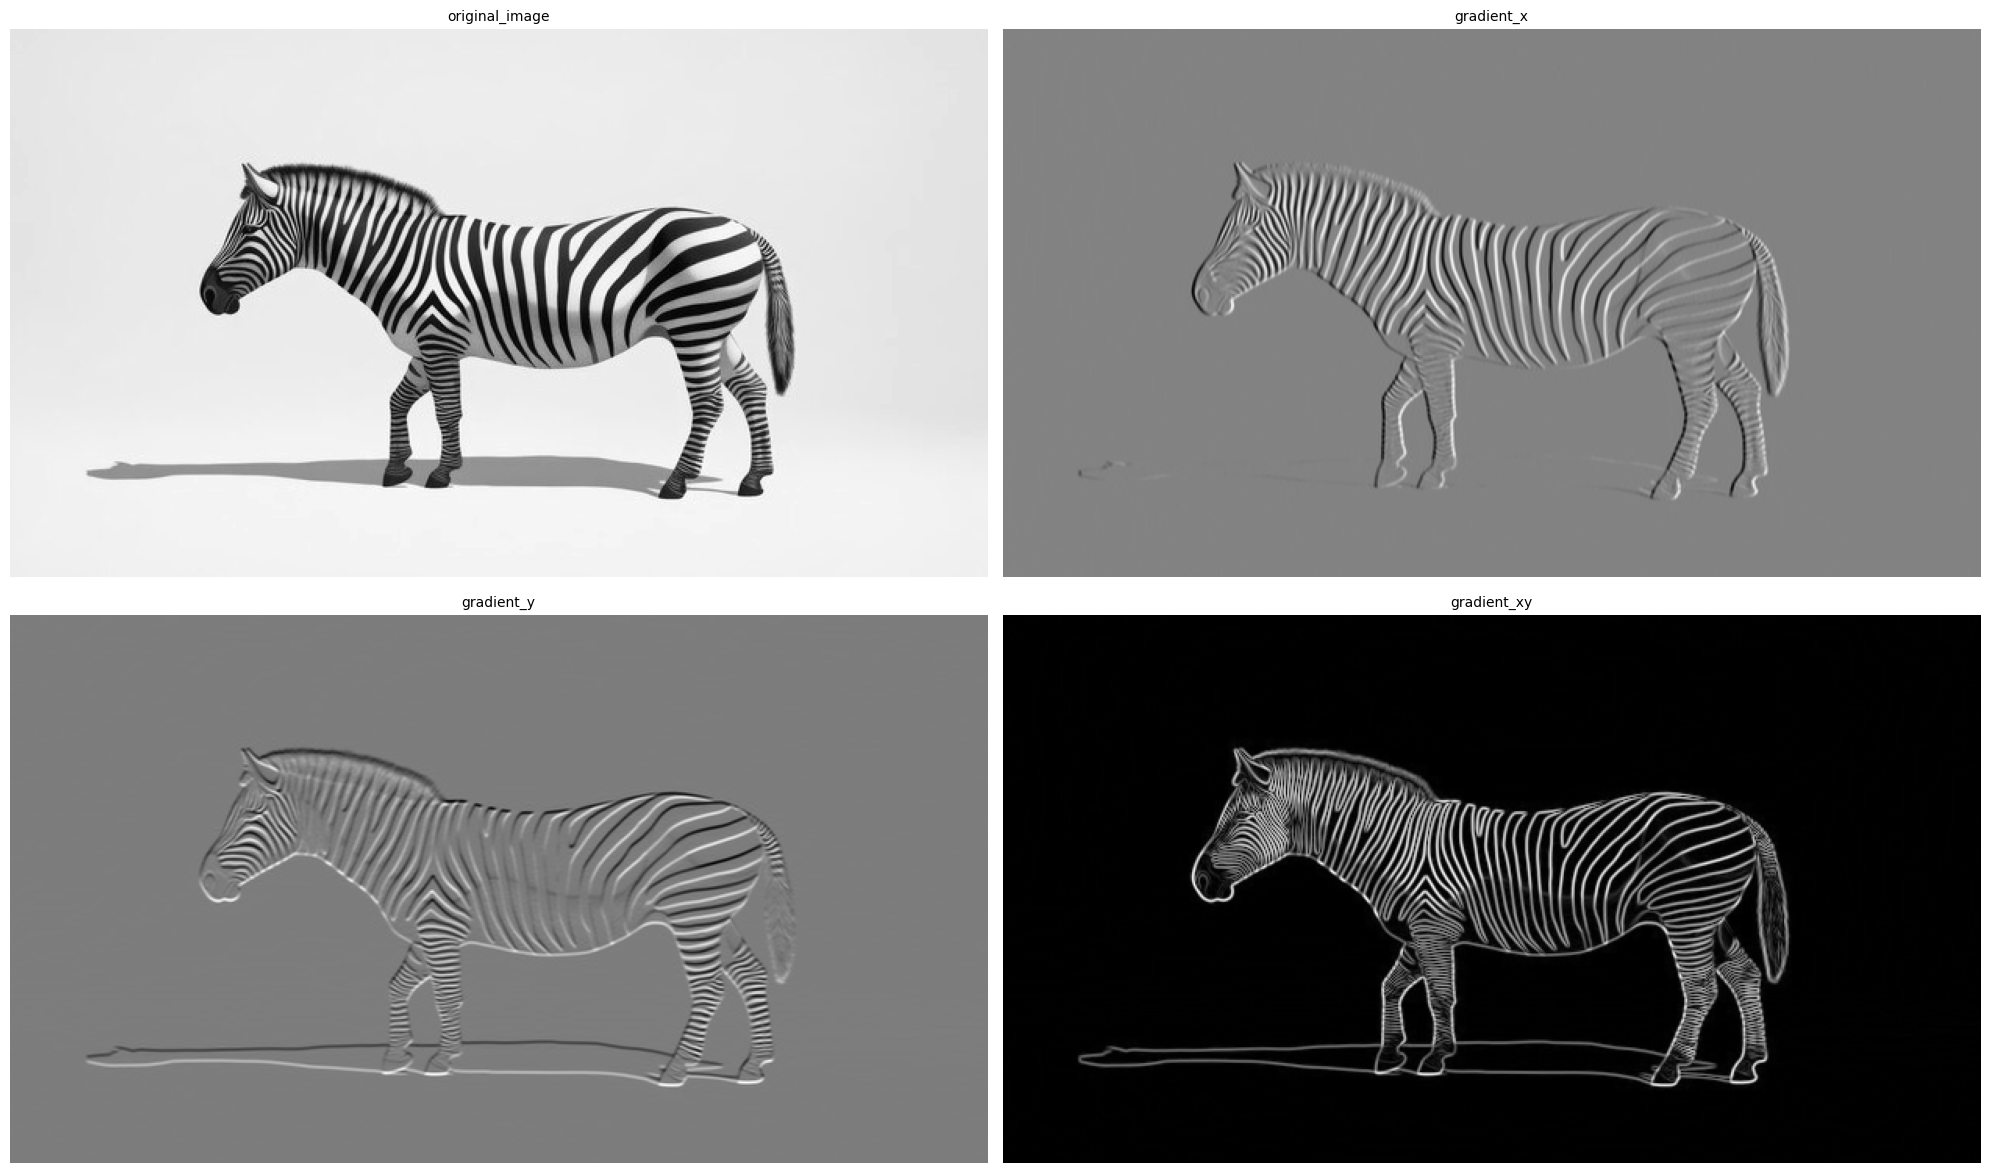

In [ ]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])



gradient_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
gradient_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)
gradient_xy = cv2.magnitude(gradient_x, gradient_y)

images = [image, gradient_x, gradient_y, gradient_xy]
descriptions = ["original_image", "gradient_x", "gradient_y", "gradient_xy"]

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

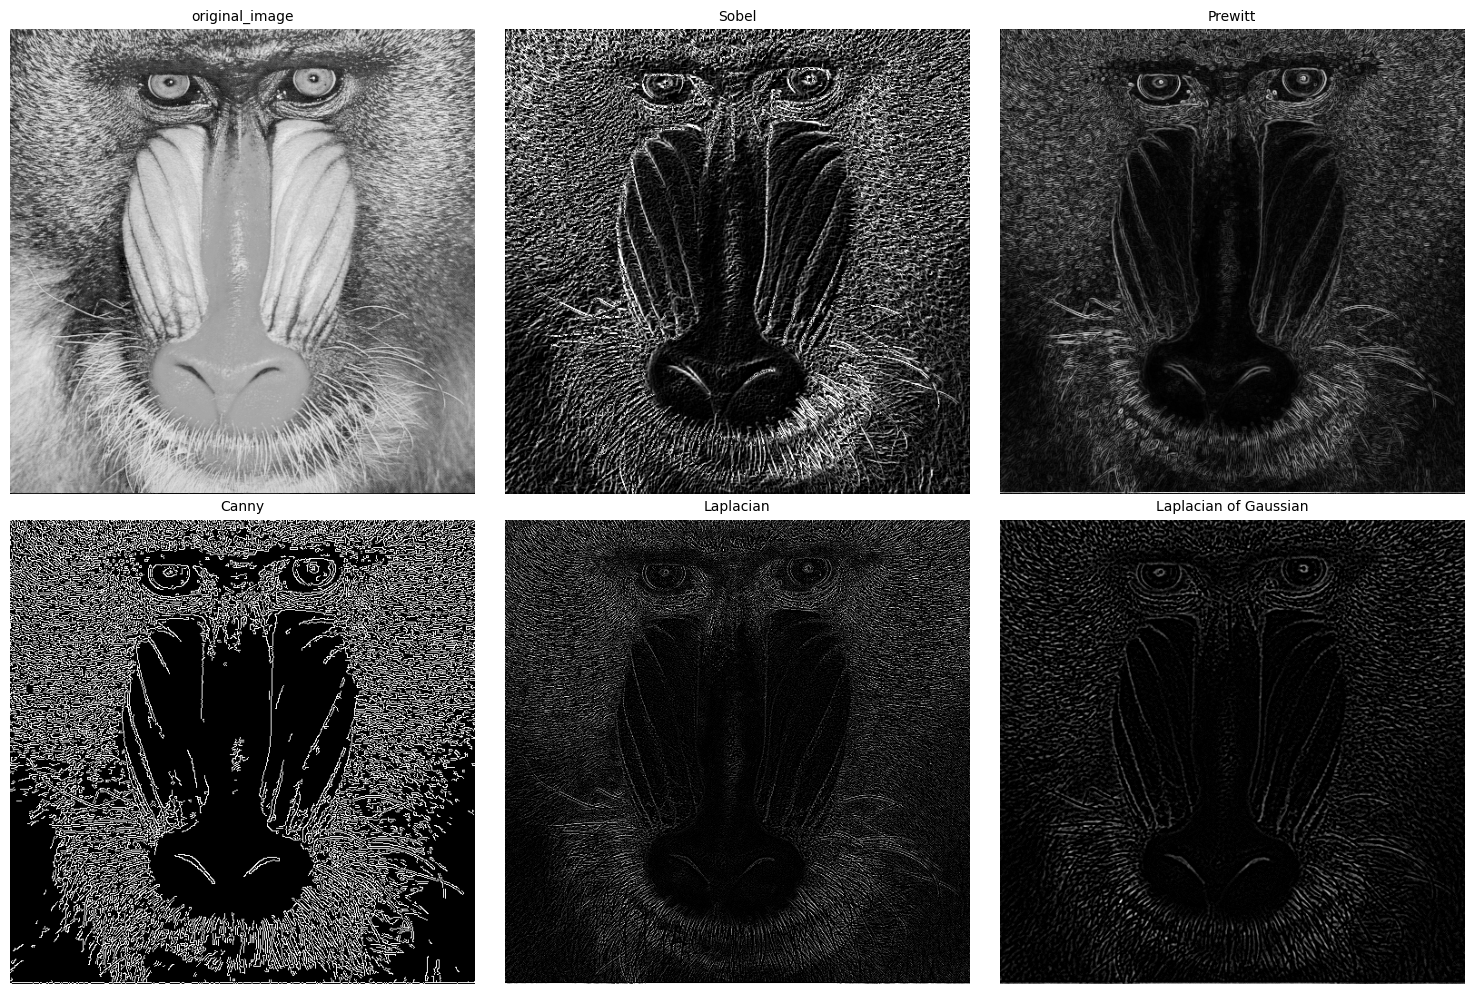

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('baboon.png', cv2.IMREAD_GRAYSCALE)

def prewitt_edge_detection(image):

    kernel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    kernel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    grad_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)
    grad = cv2.magnitude(grad_x, grad_y)
    return grad

sobel_edges = cv2.Sobel(image, -1, 1, 0, ksize=3) + cv2.Sobel(image, -1, 0, 1, ksize=3)
prewitt_edges = prewitt_edge_detection(image)
canny_edges = cv2.Canny(image, 100, 200)
laplacian_edges = cv2.Laplacian(image, -1)
log_edges = cv2.GaussianBlur(image, (5, 5), 0)
log_edges = cv2.Laplacian(log_edges, -1)

images = [image, sobel_edges, prewitt_edges, canny_edges, laplacian_edges, log_edges]
descriptions = ["original_image", "Sobel", "Prewitt", "Canny", "Laplacian", "Laplacian of Gaussian"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()